findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


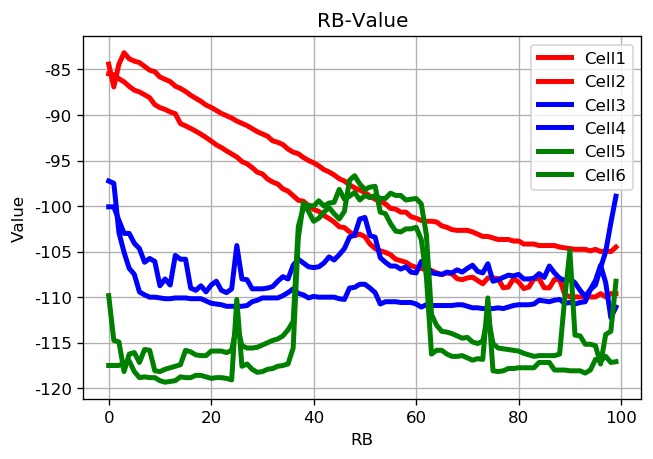

In [1]:
# coding: utf-8

from sklearn.cluster import KMeans
from sklearn import preprocessing

import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
# 输入数据

data = pd.read_csv(r'C:\Users\24407\干扰\Data\rbdata.csv', encoding='gbk')
train_x = data[["0","1","2","3","4","5","6","7","8","9","10","11","12"]]
df = pd.DataFrame(train_x)

kmeans = KMeans(n_clusters=9)

# 规范化到 [0,1] 空间

min_max_scaler=preprocessing.MinMaxScaler()

train_x=min_max_scaler.fit_transform(train_x)

# kmeans 算法

kmeans.fit(train_x)
predict_y = kmeans.predict(train_x)    #计算最近的类


mpl.rcParams['font.sans-serif'] = ['YaHei Consolas Hybrid']   # 指定默认字体 


# 合并聚类结果，插入到原数据中
result = pd.concat((data,pd.DataFrame(predict_y)),axis=1)
result.rename({0:u'Cluster'},axis=1,inplace=True)
result.to_csv(r'C:\Users\24407\干扰\Data\RBdataTemp.csv', header=1)
#print (result)

#行列转换
import pandas as pd
df = pd.read_csv(r'C:\Users\24407\干扰\Data\RBdataTemp.csv')
data = df.values  # data是数组，直接从文件读出来的数据格式是数组
index1 = list(df.keys())  # 获取原有csv文件的标题，并形成列表
del index1[0]
data = list(map(list, zip(*data)))  # map()可以单独列出列表，将数组转换成列表
del data[0]
data = pd.DataFrame(data, index=index1)  # 将data的行列转换
#data.to_excel(r"C:\\Users\\24407\\Desktop\\ClusterResult.xlsx", header=0)
#print (data)

#画图
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import pandas as pd

df = pd.read_excel(r'C:\Users\24407\干扰\Data\ClusterResult_生成专利图.xlsx')
df.drop([len(df)-1],inplace=True)

#print (df)
plt.figure(dpi=120)
plt.plot(df["CELL"],df["Cell1"],label='Cell1',linewidth=3,color='r')
plt.plot(df["CELL"],df["Cell2"],label='Cell2',linewidth=3,color='r')
plt.plot(df["CELL"],df["Cell10"],label='Cell3',linewidth=3,color='b')
plt.plot(df["CELL"],df["Cell11"],label='Cell4',linewidth=3,color='b')
plt.plot(df["CELL"],df["Cell9"],label='Cell5',linewidth=3,color='g')
plt.plot(df["CELL"],df["Cell13"],label='Cell6',linewidth=3,color='g')

plt.xlabel("RB")
plt.ylabel('Value')
plt.title("RB-Value")
plt.legend()
plt.grid()
plt.show()
